In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [76]:
def plot_binary_scatter(
    df,
    x_axis_description="Take off distance",
    y_axis_description="Jump Status (0 or 1)",
    title="Jump Outcomes from Game Observations"
):
    """
    Blog-friendly scatter plot for binary classification data.

    Assumptions:
    - df.iloc[:, 0] -> X values
    - df.iloc[:, 1] -> Binary class (0 or 1)
    """

    x = df.iloc[:, 0]
    y = df.iloc[:, 1]

    plt.figure(figsize=(10, 6), dpi=150)

    # Class 0 (downward triangle)
    plt.scatter(
        x[y == 0],
        y[y == 0],
        marker="v",              # downward triangle
        s=80,
        color="#4C72B0",
        alpha=0.75,
        edgecolors="white",
        linewidth=0.9,
        label="Jump failed"
    )

    # Class 1 (upward triangle)
    plt.scatter(
        x[y == 1],
        y[y == 1],
        marker="^",              # upward triangle
        s=80,
        color="#DD8452",
        alpha=0.75,
        edgecolors="white",
        linewidth=0.9,
        label="Jump successful"
    )

    # Title & labels
    plt.title(title, fontsize=18, weight="bold", pad=14)
    plt.xlabel(x_axis_description, fontsize=13, labelpad=10)
    plt.ylabel(y_axis_description, fontsize=13, labelpad=10)

    # Binary y-axis formatting
    plt.yticks([0, 1], ["0", "1"], fontsize=11)
    plt.xticks(fontsize=11)

    # Subtle grid
    plt.grid(
        True,
        linestyle="--",
        linewidth=0.6,
        alpha=0.3
    )

    # Clean blog-style frame
    ax = plt.gca()
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_alpha(0.4)
    ax.spines["bottom"].set_alpha(0.4)

    # Legend
    plt.legend(frameon=False, fontsize=11, loc="upper right")

    plt.tight_layout()
    plt.show()


In [63]:
dataset_path = "../observations.csv"
take_off_distance = "take_off_distance"
jump_status = "jump_status"

observations = pd.read_csv(dataset_path)
observations = observations[observations[take_off_distance] >= 0]

observations = observations.drop_duplicates(subset=[take_off_distance])

In [64]:
observations.head()

,take_off_distance,jump_status
0,47.0,1
1,135.0,1
4,199.0,1
5,111.0,1
9,127.0,1


In [67]:
n = 5

jump_failed_observations = observations[observations[jump_status] == 0].sample(n)
jump_success_observations = observations[observations[jump_status] == 1].sample(n)

sample_observations = pd.concat([jump_failed_observations, jump_success_observations])

In [68]:
sample_observations

,take_off_distance,jump_status
12,255.0,0
144,239.0,0
220,311.0,0
201,319.0,0
154,303.0,0
1,135.0,1
4,199.0,1
5,111.0,1
9,127.0,1
219,95.0,1


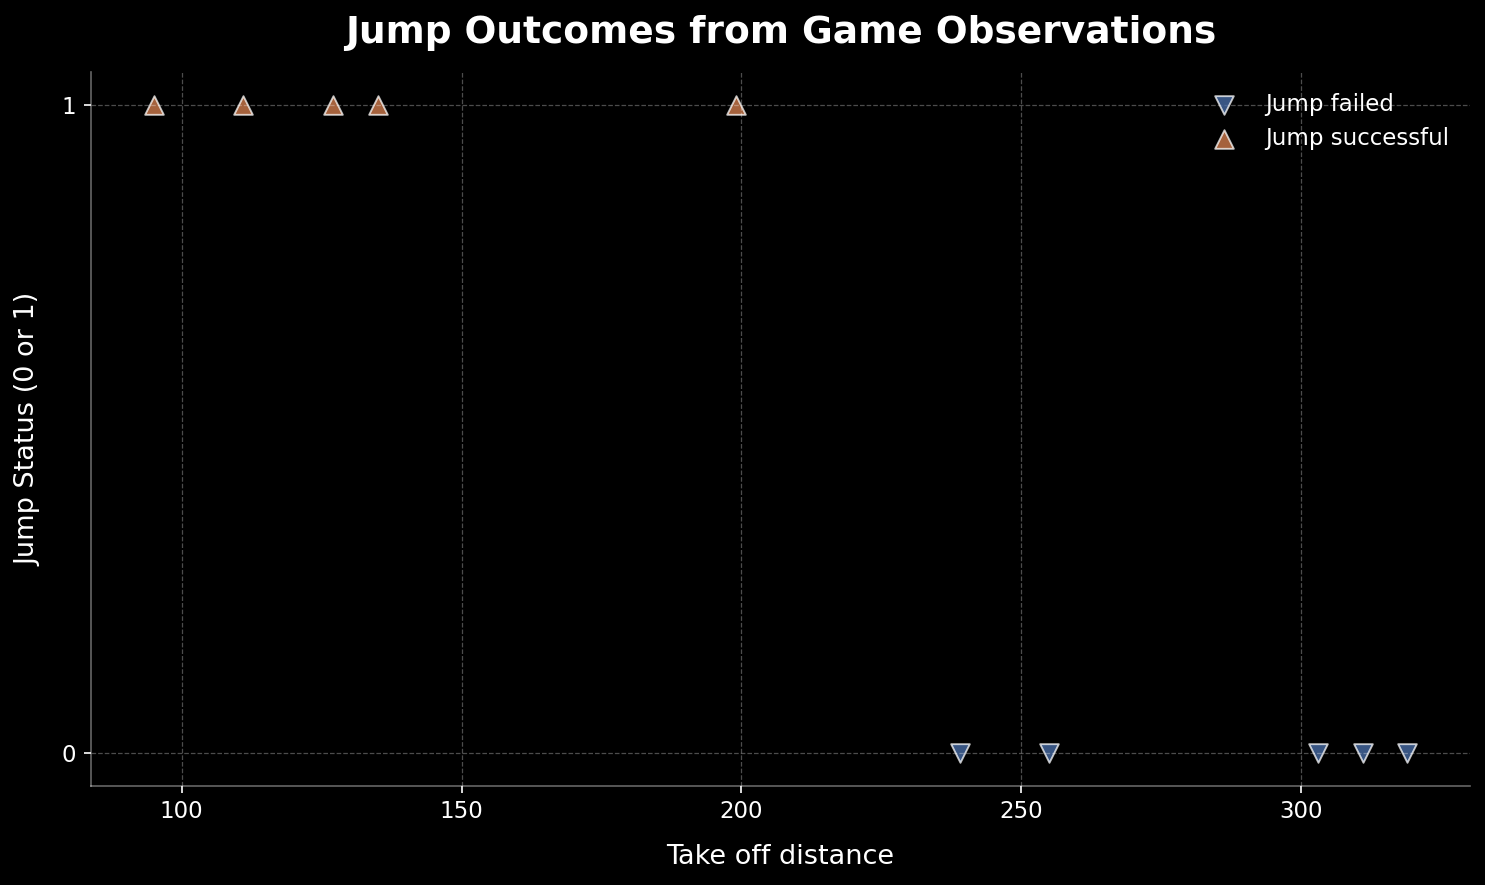

In [77]:
plot_binary_scatter(sample_observations)